<a href="https://colab.research.google.com/github/kylie17kelly/Machine-Learning-Projects/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regularization

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set() 

#imported this at the end of the assignment to make code easier to read. 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#setting seed to 1000
rand_state= 1000

In [ ]:
#importing raw form of cleaned dataset
df = pd.read_csv ('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW5/wage_regularization.csv')

In [ ]:
#Convert to html file

%%shell
jupyter nbconvert --to html /content/HW5_Regularization.ipynb

[NbConvertApp] Converting notebook /content/HW5_Regularization.ipynb to html
[NbConvertApp] Writing 608317 bytes to /content/HW5_Regularization.html


In [ ]:
#returning first five columns to look at data
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


# **Question 1**

In [ ]:
#importing package to scale features
from sklearn.preprocessing import StandardScaler

In [ ]:
#standarizing new variables
#calling new standarized datafram df_sc
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[-0.46751952, -0.66885143, -0.681389  , ..., -0.70895446,
        -0.72303072, -0.73357606],
       [-0.37101938,  2.06403752,  2.2236843 , ...,  1.29793053,
         1.31081019,  1.32021092],
       [-0.32895523,  0.24211155,  0.1578544 , ..., -0.11772087,
        -0.16164066, -0.20360711],
       ...,
       [-1.03909722, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [-0.21018583, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [ 0.10405818, -0.66885143, -0.681389  , ...,  0.54970162,
         0.51165088,  0.4716505 ]])

In [ ]:
#returning first five columns of new dataset df_sc
#looking at the coefficients, the features have been scaled
#scaling the features helps minimize the cost function
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

#below is out feature space. We will use all the features

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


# **Question 2**

In [ ]:
#splitting the data into test (20%) and train (80%)
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


# **Question 3**

In [ ]:
#using stats.model.api package to use sm.OLS().
#this gives us the output for OLS to use as a benchmark for our regularization outputs later in the code
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.116
Method:                 Least Squares   F-statistic:                              10.84
Date:                Wed, 05 Oct 2022   Prob (F-statistic):                    2.52e-17
Time:                        17:53:33   Log-Likelihood:                         -1016.0
No. Observations:                 748   AIC:                                      2052.
Df Residuals:                     738   BIC:                                      2098.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Question 3.2 and 3.3



> The r-squared of the OLS output is 0.128. This means that 12.8% of the change in wage is due to our feature variables. This r-squared level is low, meaning the linear model does a poor job of predicting the test data. In the output above, none of the features  are significant at a 5% level---all of the p-values are greater than 0.05. That means that the features are insignificant and not different than zero. 



# **Question 4**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

### Question 4.1

In [ ]:
# starting with default parameters:
model_linear = LinearRegression()
model_ridge = Ridge(0)
model_lasso = Lasso(0)
model_net = ElasticNet(0)

### Question 4.2

In [ ]:
#training models with default features
#saving predicted values for the test set as y_hat
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

### Question 4.3

In [ ]:
#constructing data frame of the predicted values for the estimated output of all th emodels
#defining new data frame as df_predictions
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})

#returning first five rows of data to see columns
#outputted columns are our predicted values for wage, using the different models with default features
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.267169,-0.201887,-0.201887
238,1.910343,0.699718,0.699715,0.690517,0.690517
531,-0.700110,-0.065042,-0.065041,0.040769,0.040769
157,2.328510,0.689508,0.689508,0.642706,0.642706
601,1.341239,0.208652,0.208655,0.169808,0.169808


In [ ]:
#looking at features
df.drop('wage', axis=1, inplace=False).columns

Index(['educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2', 'age3',
       'age4', 'age5'],
      dtype='object')

### Question 4.4

In [ ]:
#estimating the coefficients from each model and stacking them all along 
#with feature names in a new data fram called coefficients

coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,-109.991877,0.055649,0.055649
1,educ2,462.562174,462.562716,0.556008,0.556008
2,educ3,-736.380870,-736.381701,0.180667,0.180667
3,educ4,527.476085,527.476652,-0.126316,-0.126316
4,educ5,-143.414487,-143.414633,-0.365808,-0.365808
5,age,-1295.337038,-1295.075069,-0.069215,-0.069215
6,age2,5164.461988,5163.395940,0.301351,0.301351
7,age3,-7783.011658,-7781.378919,0.134377,0.134377
8,age4,5255.053775,5253.938511,-0.024705,-0.024705
9,age5,-1341.061042,-1340.774439,-0.173421,-0.173421


### Question 4.5



> All the coefficients of Lasso and ElasticNet models are zero because the lasso constraint (L1 norm) shrinks the coefficients to zero. Lasso and ElasticNet (which uses a combination of ridge and lasso), perform feature selection, only selecting correlated predictors as large coefficients and the rest to zero or nearly zero. 



# **Question 5**

In [ ]:
alpha_ridge = 10**np.linspace(-4,2,100) 
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

In [ ]:
alpha_lasso = 10**np.linspace(-4,2,100)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

In [ ]:
alpha_elasticnet = 10**np.linspace(-4,2,100)
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

In [ ]:
#using cross validation to find optimal hyper parameters (labeled as alphs)
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.004977023564332114

In [ ]:
#optimal alpha output is 0.004977
alpha_ridge_opt = ridgecv.alpha_
alpha_ridge_opt

0.004977023564332114

In [ ]:
#creating optimal lasso parameter
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.010732138475800224

In [ ]:
#optimal lasso parameter is 0.010732
alpha_lasso_opt = lassocv.alpha_
alpha_lasso_opt

0.010732138475800224

In [ ]:
#creating optimal value for elastic net parameter
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.010682821217946607

In [ ]:
#half of elastic net is ridge and the other half is lasso 
#combination of lasso and ridge (L1 and L2 norm)
elasticnetcv.l1_ratio_

0.5

In [ ]:
#optimal elasticnet parameter is 0.01068
alpha_elasticnet_opt = elasticnetcv.alpha_
alpha_elasticnet_opt

0.010682821217946607

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

# **Question 6**

In [ ]:
# starting with parameters using optimal alphas:
model_linear_alpha = LinearRegression()
model_ridge_alpha = Ridge(alpha_ridge_opt)
model_lasso_alpha = Lasso(alpha_lasso_opt)
model_net_alpha = ElasticNet(alpha_elasticnet_opt)

In [ ]:
#saving predicted values for the alpha optimal parameters
y_hat_linear_alpha = model_linear_alpha.fit(X_train, y_train).predict(X_test)
y_hat_ridge_alpha = model_ridge_alpha.fit(X_train, y_train).predict(X_test)
y_hat_lasso_alpha = model_lasso_alpha.fit(X_train, y_train).predict(X_test)
y_hat_net_alpha   = model_net_alpha.fit(X_train, y_train).predict(X_test)

In [ ]:
#defining new predicted output for alpha set as df_predictions_optimal
df_predictions_optimal = pd.DataFrame({'y_test_alpha':y_test,
                               'y_hat_linear_alpha':y_hat_linear,
                               'y_hat_ridge_alpha':y_hat_ridge,
                               'y_hat_lasso_alpha':y_hat_lasso,
                               'y_hat_net_alpha':y_hat_net})

#output first five rows of data to look at columns
#data shows predicted values for models using optimal alphas
df_predictions_optimal.head()

,y_test_alpha,y_hat_linear_alpha,y_hat_ridge_alpha,y_hat_lasso_alpha,y_hat_net_alpha
434,0.042199,-0.267170,-0.267169,-0.201887,-0.201887
238,1.910343,0.699718,0.699715,0.690517,0.690517
531,-0.700110,-0.065042,-0.065041,0.040769,0.040769
157,2.328510,0.689508,0.689508,0.642706,0.642706
601,1.341239,0.208652,0.208655,0.169808,0.169808


# **Question 7**

In [ ]:
#RMSE test for the linear regression is .0865

MSE_test_lin_alpha = np.mean(np.square(df_predictions_optimal['y_test_alpha'] - df_predictions_optimal['y_hat_linear_alpha']))
RMSE_test_lin_alpha = np.sqrt(MSE_test_lin_alpha)
np.round(RMSE_test_lin_alpha,3)

0.865

In [ ]:
#RMSE test for ridge model is 0.865

MSE_test_ridge_alpha = np.mean(np.square(df_predictions_optimal['y_test_alpha'] - df_predictions_optimal['y_hat_ridge_alpha']))
RMSE_test_ridge_alpha = np.sqrt(MSE_test_ridge_alpha)
np.round(RMSE_test_ridge_alpha,3)

0.865

In [ ]:
#RMSE test for lasso model is 0.867

MSE_test_lasso_alpha = np.mean(np.square(df_predictions_optimal['y_test_alpha'] - df_predictions_optimal['y_hat_lasso_alpha']))
RMSE_test_lasso_alpha = np.sqrt(MSE_test_lasso_alpha)
np.round(RMSE_test_lasso_alpha,3)

0.867

In [ ]:
#RMSE test for elasticnet model is 0.867

MSE_test_net_alpha = np.mean(np.square(df_predictions_optimal['y_test_alpha'] - df_predictions_optimal['y_hat_net_alpha']))
RMSE_test_net_alpha = np.sqrt(MSE_test_net_alpha)
np.round(RMSE_test_net_alpha,3)

0.867



> No, the models were not able to beat the linear regression RMSE. The ridge model had the same RMSE as the linear model of 0.865 and the lasso and elasticnet model both had an RMSE of 0.867. The reason the models could not be outperforming the linear model is that we are using one train/test split. If we use a k-fold technique and average the RMSE, we could see a different output. This could also be that the linear model is somewhat overfit which leads to smaller errors. Because of the bias variance tradeoff, the ridge, lasso, and elastic net models will have a little more bias to reduce the variance. 




# **Question 8**

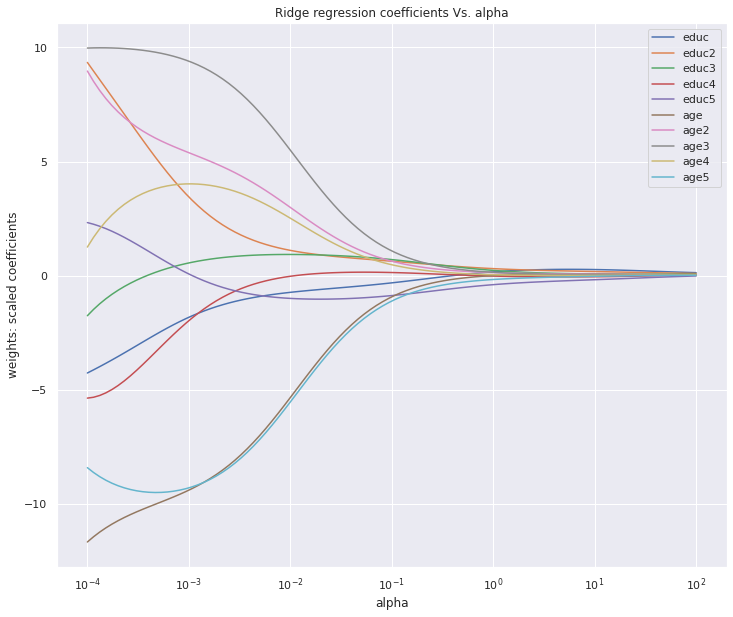

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()



**> Interpretation** 


> Looking at the graph above we can see the shrinkage penalty shrinking the estimates towards zero. As alpha increases,the coefficient for educ2 dives signifantly towards zero suggesting the feature is more insignifacant than the other features. Similar conclusions can be drawn for age2 looking at the output. As alpha approaches infinity, the coefficients are drawn closer to zero.





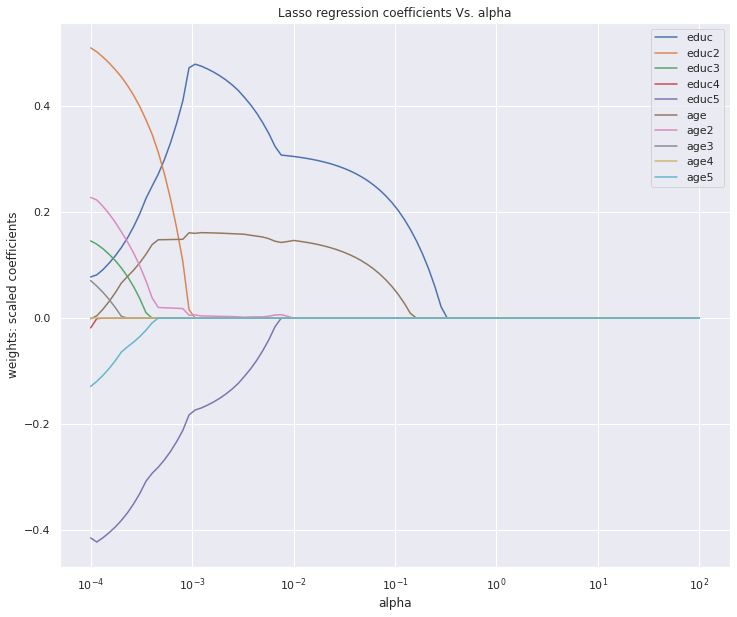

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

**> Interpretation** 


> Looking at the graph above, we can see that the Lasso penalty is setting coefficients to zero as alpha increases and clearly utilizing feature selection. When alpha is at 0.1, age and educ are the only two surviving features. The other features are eliminated (set to zero), as the model interprets these features as the least important variables from the model. 



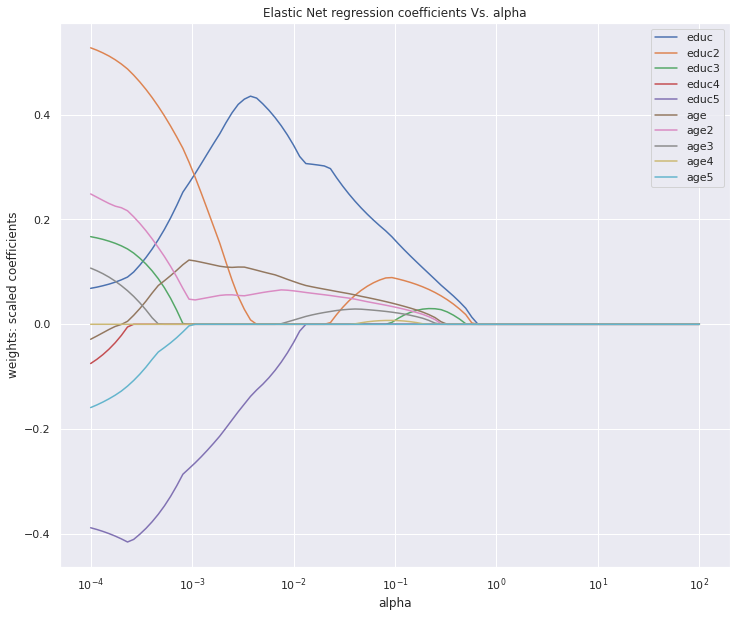

In [ ]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

**> Interpretation** 


> Looking at the graph above we can see that some features are set to zero and the magnitude of the other features are reduced. The optimal alpha for elastic net was calculated at 0.01, which shows that educ2 is not signifant at this alpha level. Looking at the graph, when alpha=0.01, the coefficients that are most significant are educ, age, age2, age3, and educ5



# **Question 9**

In [ ]:
coefficients_alpha = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients_alpha['model_lin_alpha']= model_linear_alpha.coef_
coefficients_alpha['model_ridge_alpha']= model_ridge_alpha.coef_
coefficients_alpha['model_lasso_alpha']= model_lasso_alpha.coef_
coefficients_alpha['model_net_alpha']= model_net_alpha.coef_
coefficients_alpha

,Features,model_lin_alpha,model_ridge_alpha,model_lasso_alpha,model_net_alpha
0,educ,-109.991745,-0.910987,0.304250,0.331947
1,educ2,462.562174,1.455929,0.000000,0.000000
2,educ3,-736.380870,0.908692,0.000000,0.000000
3,educ4,527.476085,-0.296863,0.000000,-0.000000
4,educ5,-143.414487,-0.866506,-0.000000,-0.024823
5,age,-1295.337038,-7.010431,0.145802,0.079775
6,age2,5164.461988,3.903669,0.000071,0.063142
7,age3,-7783.011658,7.161033,0.000000,0.009603
8,age4,5255.053775,3.261689,0.000000,0.000000
9,age5,-1341.061042,-7.185003,0.000000,0.000000


### 9.1



> Looking at the Ridge Regression, the coefficients that drop the most from 0.0001 to 10 are age and age 3. 



### 9.2



> Looking at the Lasso Regression plot, the two coefficients that survive when alpha=0.1 are educ and age. 



### 9.3



> The Lasso coefficients are larger in magnitude than the ElasticNet coefficients when alpha=0.0001 because the Lasso model shrinks features to zero, essentially enabling feature selection. The features the Lasso model selects may have larger coefficients becuase the model interprets the values as more significant. Because the ElasticNet model includes Lasso and Ridge, it will reduce the magnitude of the other weights, not just eliminating features to zero. This results in the features that Lasso selects being larger than the most dominant features in the ElasticNet model.

